In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import root
import os
from scipy.interpolate import make_interp_spline
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib import rc
import scipy.optimize as optimization
from scipy.interpolate import make_interp_spline
import emcee
import scipy

rc('font',**{'size':16})
rc('figure', figsize=(6.0, 6/1.5555))
rc('figure', dpi=300)

/var/folders/wx/s6tdgfqx1pz781my7s5xrhtc0000gp/T/ipykernel_47752/3759983462.py:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--8.91--5.91-1.814159-1000000-40-0-quantiles.csv
o MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--7.09--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--7.45--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--8.18--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--8.55--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--10.0--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--7.82--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--9.27--5.91-1.814159-1000000-40-0-quantiles.csv
x MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--9.64--5.91-1.814159-1000000-40-0-quantiles.csv
o MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--6.73--5.91-1.814159-1000000-40-0-quantiles.csv


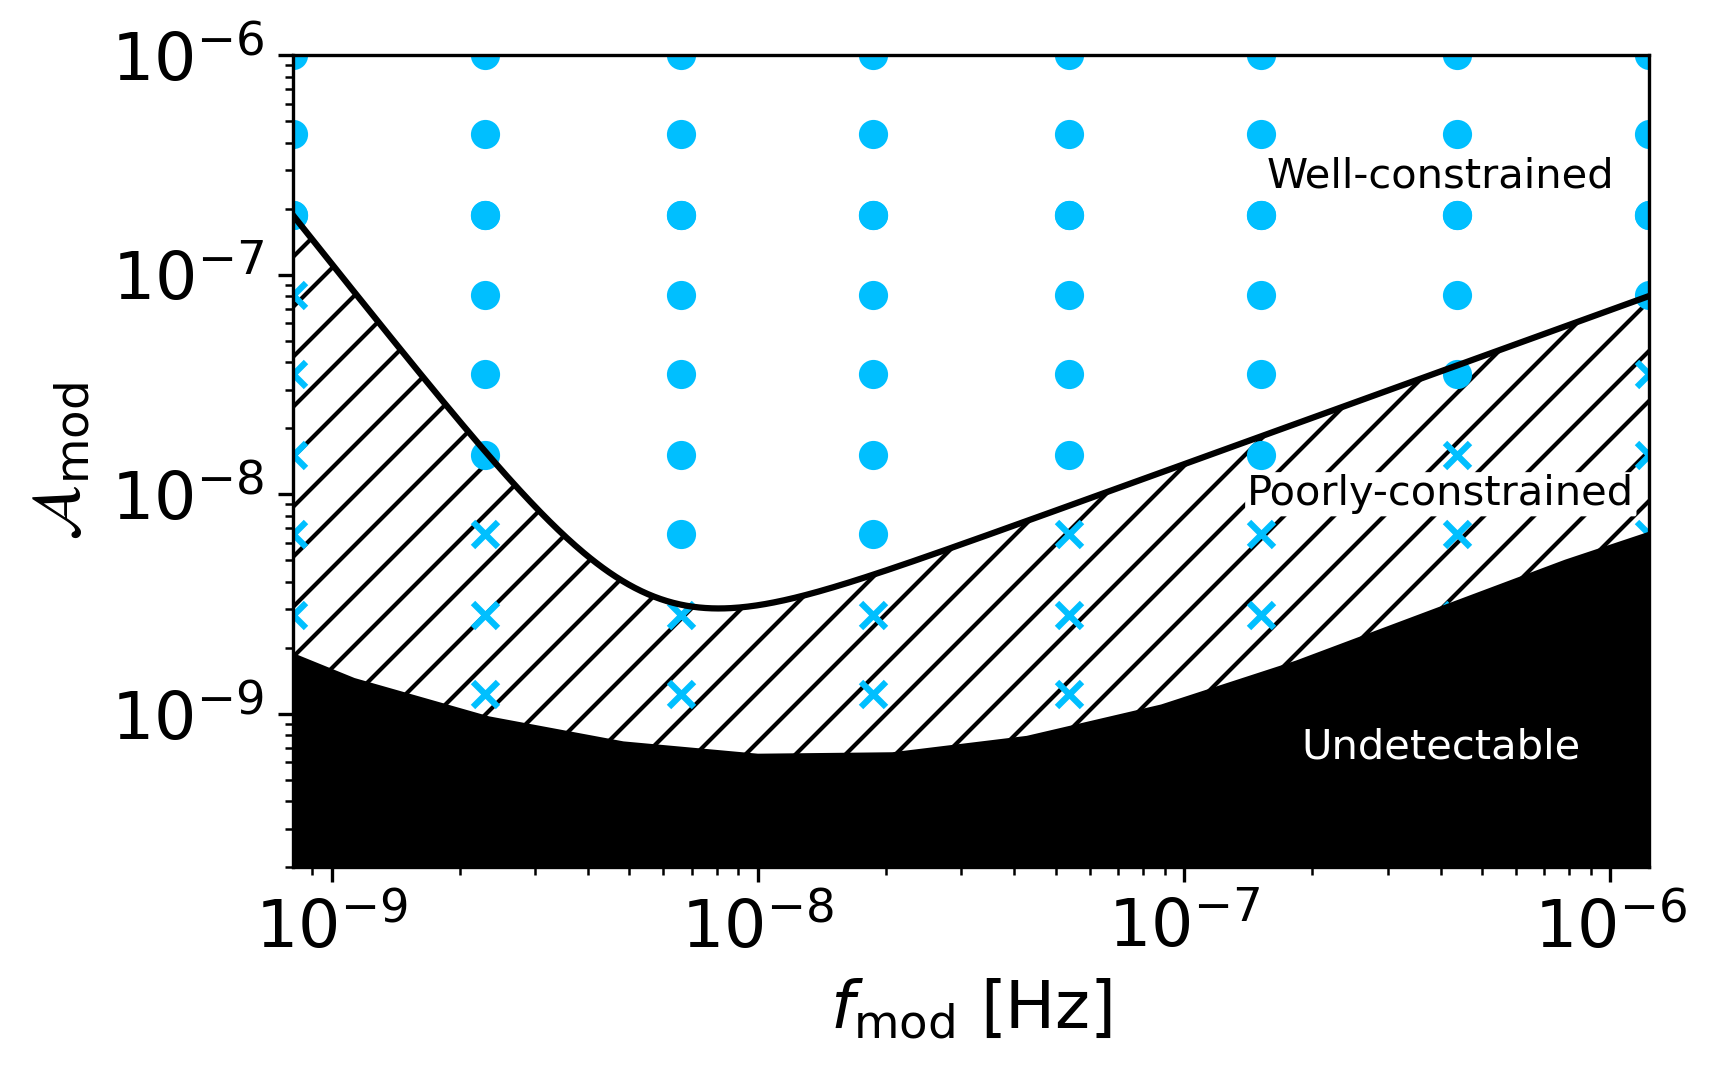

In [2]:
z = 0.8

Amods = np.array([])
Amods_confident = np.array([])
Amods_NullHypo = np.array([])
fmods = np.array([])
fmods_confident = np.array([])
fmods_NullHypo = np.array([])
cs = np.array([])

for file in glob.glob('MCMC-Full-BNS/GW-'+'*1.188*.csv'):

    data = np.loadtxt(file,delimiter=',')
    head = np.fromstring(file[13+8:-14],sep='-')
    
    Amod = head[4]
    fmod = head[5]
    if((fmod!=-8) and (Amod!=-8) and fmod>-9.4):

        c = ((10**(Amod+data[5][3])-10**(Amod))/10**Amod)
        c = ((10**(data[5][1]+data[5][3])-10**(data[5][1]))/10**Amod)
        c = ((10**(data[5][1]+data[5][3])-10**(data[5][1]))/10**(data[5][1]))
        cs = np.append(cs,c)
            
        if(data[5][3]>1 or 10**Amod>10**(data[5][2]) or 10**Amod<10**(data[5][0])):
            marker = 'x'

        else: 
            marker = 'o'
            Amods_confident = np.append(Amods_confident,Amod)
            fmods_confident = np.append(fmods_confident,fmod)
        Amods = np.append(Amods,Amod)
        fmods = np.append(fmods,fmod)
        
        if(fmod==-5.91):
            print(marker,file)
        
        plt.scatter(10**fmod,10**Amod,c='deepskyblue',marker=marker)



plt.ylim(2e-10,1e-6)
plt.xlim(10**min(np.unique(fmods_confident)),10**max(np.unique(fmods_confident)))
plt.xscale('log')
plt.yscale('log')

def func(x, x_0, b, alpha, beta):
    a = b*x_0**(beta-alpha)
    y1 = a*x**alpha
    y2 = b*x**beta
    
    return y1+y2


x = np.unique(fmods_confident)
y = (np.array([min(Amods_confident[fmods_confident==fmod_unique]) for fmod_unique in np.unique(fmods_confident)]))
X_Y_Spline = make_interp_spline(x, y)
X1_ = np.linspace(x.min(), x.max(), 1500)
Y1_ = X_Y_Spline(X1_)

for fmod in np.unique(fmods_confident):
    for Amod in [-6.73, -6.36, -6]:
        plt.scatter(10**fmod,10**Amod,c='deepskyblue',marker='o')

x0 = np.array([1e-8,1e-1,-2,1])
fit = optimization.curve_fit(func, 10**x,10**y, x0)[0]

plt.plot(np.geomspace(1e-10,1e-5,1000),func(np.geomspace(1e-10,1e-5,1000), fit[0], fit[1], fit[2], fit[3]),color='k')
plt.fill_between(np.geomspace(1e-10,1e-5,1000), 1e-10, func(np.geomspace(1e-10,1e-5,1000), fit[0], fit[1], fit[2], fit[3]),hatch='//',color='none',edgecolor='k',zorder=-1)


plt.xlabel(r'$f_{\rm mod}$ [Hz]')
plt.ylabel(r'$\mathcal{A}_{\rm mod}$')
kw = ({"bbox": dict(boxstyle="square,pad=0.1", ec="none", fc="white")})
plt.text(4e-7,2.8e-7,r"Well-constrained",rotation=0,c="k",va="center",ha="center",fontsize=10)
props = dict(boxstyle='round,pad=.05', facecolor='white', alpha=1, edgecolor='none')
plt.text(4e-7,10e-9,r"Poorly-constrained",rotation=0,c="k",va="center",ha="center",fontsize=10,bbox=props,zorder=200)
plt.text(4e-7,7e-10,r"Undetectable",rotation=0,c="white",va="center",ha="center",fontsize=10)

### Add MCMC
discard = 50000
reader = emcee.backends.HDFBackend("MCMC-Full-BNS/GW-0.84-1.188-0.68-8-3.14159--9.64--9.55-1.814159-1000000-40-0.h5", read_only=True)
samples_flat = reader.get_chain(discard=discard, thin=1, flat=True)

f_array = np.linspace(-11,-5,20)
bins = np.linspace(-10.5,-5,10)

inflection_points = np.array([])

for i,f in enumerate(f_array[:-1]):
    mask = (f<=samples_flat[:,6]) & (samples_flat[:,6]<f_array[i+1])
    x,y = np.histogram(samples_flat[:,5][mask],bins=bins)
    xx = scipy.ndimage.gaussian_filter1d(x,.3)
    inflection = np.argmin(np.gradient(xx))
    inflection_points = np.append(inflection_points,y[:-1][inflection])

plt.fill_between(10**(f_array[:-1]+np.diff(f_array)/2),1e-12,10**scipy.ndimage.gaussian_filter1d(inflection_points,2),color="black")

plt.tight_layout()
plt.show()
